In [123]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge")),
                   ])

svm_clf.fit(X, y)
#clf = LinearSVC(C=1, loss="hinge", random_state=42, dual="auto", max_iter=10000).fit(X, y)  ## trying to fit directly without scaling will produce some warnings about a convergence issue. We need to center the training set first by substracting its mean.

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [124]:
svm_clf.predict([[5.0, 1.5]])

array([0.])

In [125]:
#clf = svm_clf.steps[1][1]  ## we can extract the step from the pipeline like this

In [126]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def plot_svm(X, y, svm_clf, x_label, y_label):
    decision_function = svm_clf.decision_function(X)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    type0_x, type0_y = X[:,0][y == 0], X[:,1][y == 0]
    type1_x, type1_y = X[:,0][y == 1], X[:,1][y == 1]

    plt.scatter(type0_x, type0_y, marker="v")
    plt.scatter(type1_x, type1_y, marker="^")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        svm_clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

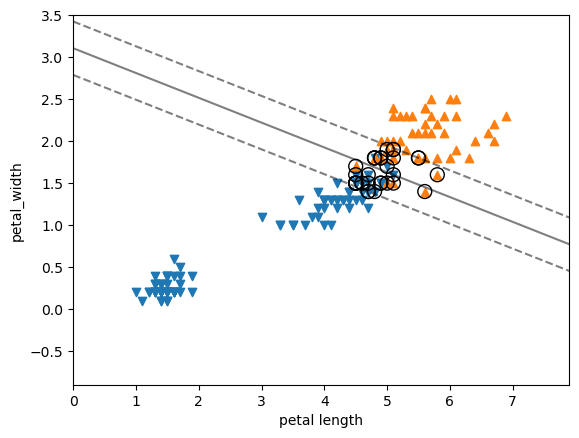

In [127]:
plot_svm(X, y, svm_clf, "petal length", "petal_width")

In [128]:
# nonlinear svm classification

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

/usr/local/anaconda3/envs/tensorflow_gpuenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

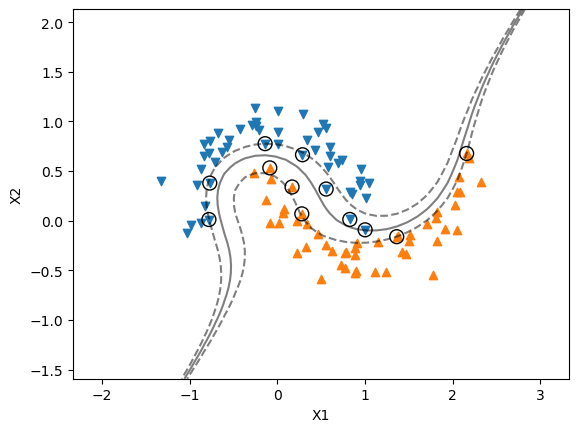

In [129]:
plot_svm(X, y, polynomial_svm_clf, "X1", "X2")

In [130]:
polynomial_svm_clf.predict([[1, -0.5]])

array([1])

In [131]:
#kernel trick

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

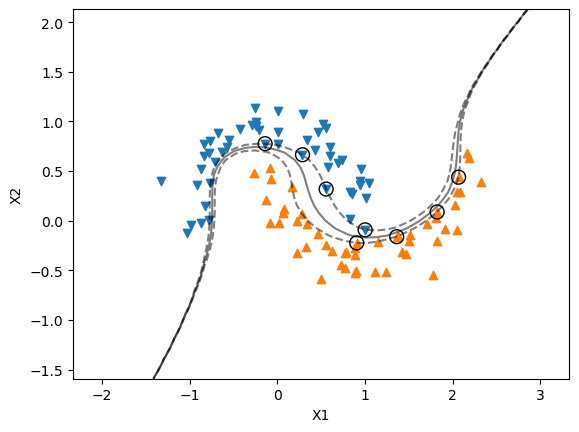

In [132]:
plot_svm(X, y, poly_kernel_svm_clf, "X1", "X2")

In [133]:
# Gaussian RBF kernel

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.01))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.01, gamma=5))])

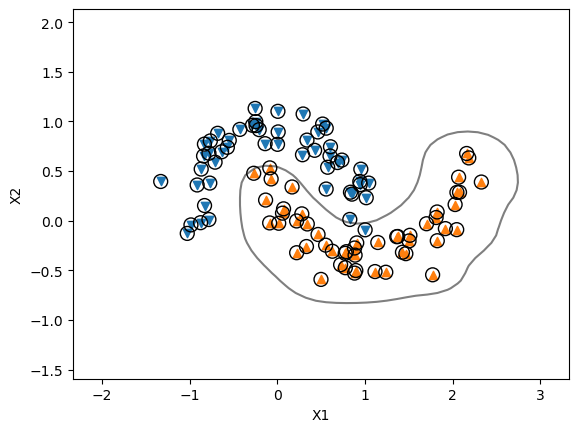

In [134]:
plot_svm(X, y, rbf_kernel_svm_clf, "X1", "X2")

In [135]:
# SVM regression

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.01)
svm_reg.fit(X, y)

LinearSVR(epsilon=0.01)

In [136]:
def plot_svm_reg(X, y, svm_clf, x_label, y_label):
    type0_x, type0_y = X[:,0][y == 0], X[:,1][y == 0]
    type1_x, type1_y = X[:,0][y == 1], X[:,1][y == 1]

    plt.scatter(type0_x, type0_y, marker="v")
    plt.scatter(type1_x, type1_y, marker="^")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        svm_clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

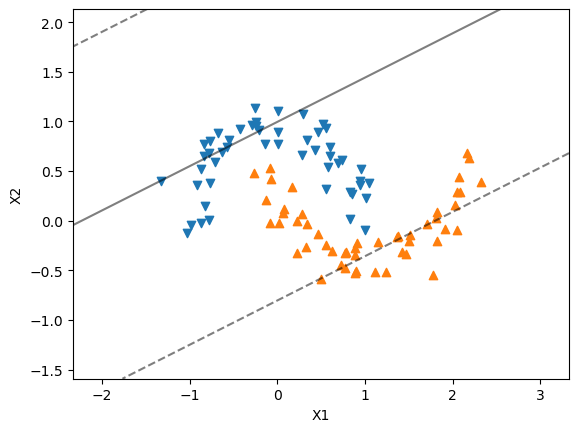

In [137]:
plot_svm_reg(X, y, svm_reg, "X1", "X2")

In [138]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

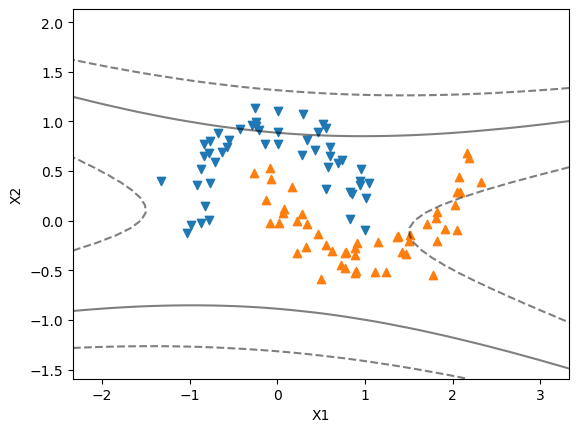

In [139]:
plot_svm_reg(X, y, svm_poly_reg, "X1", "X2")